Total length of the combined tree: 0.4227879897449764


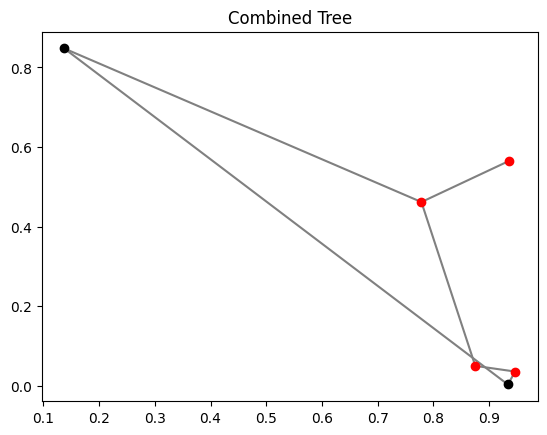

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import minimum_spanning_tree

def path_length(sp, points):
    # Calculate MSTs for both "sp" and "points"
    sp_mst = minimum_spanning_tree(cdist(sp, sp)).toarray()
    points_mst = minimum_spanning_tree(cdist(points, points)).toarray()

    # Calculate distances between "sp" and "points" nodes
    distances = cdist(sp, points)

    # Connect "sp" nodes to "points" nodes in a way that minimizes the total length
    connections = np.zeros((len(sp), len(points)))
    for i in range(len(sp)):
        min_dist_idx = np.argmin(distances[i])
        connections[i, min_dist_idx] = 1

    # Create the combined tree by merging "sp_mst," "points_mst," and "connections"
    combined_tree = np.zeros((len(sp) + len(points), len(sp) + len(points)))
    combined_tree[:len(sp), :len(sp)] = sp_mst
    combined_tree[len(sp):, len(sp):] = points_mst
    combined_tree[:len(sp), len(sp):] = connections
    combined_tree[len(sp):, :len(sp)] = connections.T

    # Connect each "sp" node to another "sp" node
    for i in range(len(sp)):
        sp_idx = np.where(connections[i] == 1)[0][0]  # Find the connected "points" node index
        other_sp = np.delete(sp, i, axis=0)  # Remove the current "sp" node from the array
        min_dist_idx = np.argmin(cdist([sp[i]], other_sp))  # Find the closest "sp" node
        combined_tree[i, min_dist_idx] = 1  # Connect the "sp" nodes

    return combined_tree


# Generate random points
n = 4 # Number of points
dim = 2  # Dimensions
# np.random.seed(2)
points = np.random.rand(n, dim)
sp = np.random.rand(n-2, dim)
combined_tree = path_length(sp, points)
# Assuming you have constructed the 'combined_tree' matrix as shown in the previous responses

# Calculate the total length of the combined tree
def get_length(sp, points, combined_tree):
    total_length = 0
    for i in range(len(combined_tree)):
        for j in range(i + 1, len(combined_tree)):
            if combined_tree[i, j] == 1:
                if i < len(sp) and j < len(sp):
                    total_length += np.linalg.norm(sp[i] - sp[j])  # Distance between "sp" nodes
                else:
                    total_length += np.linalg.norm(points[i - len(sp)] - points[j - len(sp)])  # Distance between "points" nodes
    return total_length


def get_gradient(sp, points):
    x = 0
    y = 0
    for i in range(len(points)):
        x += (point[0]-points[i,0])/np.linalg.norm(points[i,:]-point)
        y += (point[1]-points[i,1])/np.linalg.norm(points[i,:]-point)
        
    return (x, y)

for i in range(len(combined_tree)):
    for j in range(i + 1, len(combined_tree)):
        if i < len(sp):
            p1 = sp[i]
        else:
            p1 = points[i - len(sp)]

        if j < len(sp):
            p2 = sp[j]
        else:
            p2 = points[j - len(sp)]

        if combined_tree[i, j] > 0:
            plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-', color='gray')

    if i < len(sp):
        color = 'black'  # "sp" nodes are black
        plt.plot(sp[i,0], sp[i,1], 'o', color=color)
    else:
        color = 'red'  # "points" nodes are red
        plt.plot(points[i-len(sp),0], points[i-len(sp),1], 'o', color=color)
    

plt.title("Combined Tree")
plt.show()

# Gradient Descent
learning_rate = 10
iterations = 10000


for i in range(iterations):
    
    gradient = get_gradient(sp, points)
    for j in range(len(sp)):
        sp[j] -= learning_rate * gradient[j]

    # if i % 10 == 0:
    #     cost = cost_function(current_point, points)
        # print(f"Iteration {i}: Cost = {cost:.4f}")

final_cost = get_length(sp, points, combined_tree)
print("Final point:", current_point)
print("Final cost:", final_cost)

plt.plot(current_point[0],current_point[1],'bo')

# # [0.4999049168251894, 0.5023010914401557]